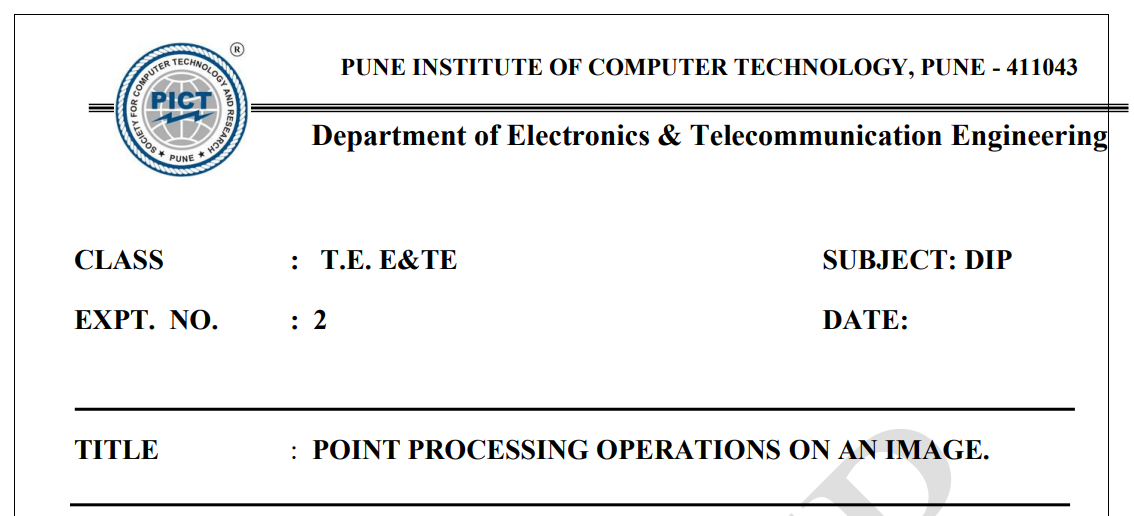

In [ ]:
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

print("OpenCV Version: ", cv2.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("NumPy version:", np.__version__)

def imshow(title: str = "",
           image: np.ndarray = None,
           subplot: bool = False,
           row: int = 0, col: int = 0, num: int = 0) -> None:
    """
    Display an image using matplotlib.pyplot.

    Parameters:
    - title (str): Title to be displayed above the image.
    - image (np.ndarray): Input image as a NumPy array (BGR format).
    - subplot (bool): If True, the image is displayed as a subplot.
    - row (int): Row position for the subplot.
    - col (int): Column position for the subplot.
    - num (int): Subplot number.

    Returns:
    None

    Example:
    imshow(title="Example Image", image=my_image)
    """
    # Convert image to 8-bit depth using normalization
    normalized_image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    if subplot:
        plt.subplot(row, col, num)
        plt.imshow(cv2.cvtColor(normalized_image, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    else:
        plt.imshow(cv2.cvtColor(normalized_image, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
        plt.show()


OpenCV Version:  4.8.0
Matplotlib version: 3.7.1
NumPy version: 1.23.5


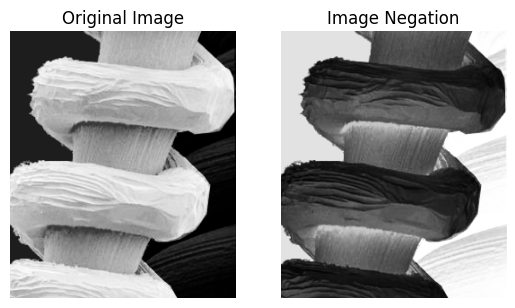

In [ ]:
img = cv2.imread("/content/drive/MyDrive/dip_Images/Fig0327(a)(tungsten_original).tif",cv2.COLOR_BGR2GRAY)
imshow("Original Image",img, subplot=True, row=1, col=2, num=1)
img_negative = 255 - img
imshow("Image Negation",img_negative, subplot=True, row=1, col=2, num=2)

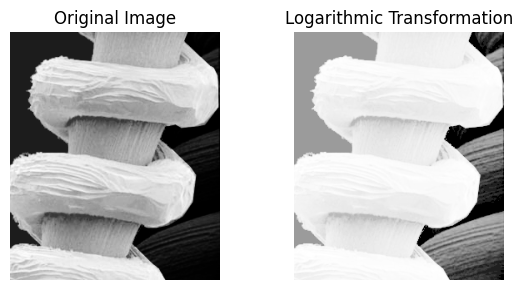

In [ ]:
import matplotlib.pyplot as plt
    from PIL import Image
import numpy as np
from IPython.display import display

img_path = "/content/drive/MyDrive/dip_Images/Fig0327(a)(tungsten_original).tif"
img = Image.open(img_path)

c = 255 / np.log(1 + np.max(np.array(img)))
img_log = c * np.log(1 + np.array(img))
img_log = Image.fromarray(img_log.astype(np.uint8))

fig, axes = plt.subplots(1, 2, figsize=(6, 3))

axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')

axes[1].imshow(img_log, cmap='gray')
axes[1].set_title('Logarithmic Transformation')

for ax in axes:
    ax.axis('off')

plt.tight_layout()

plt.show()

### Log Transformation plot

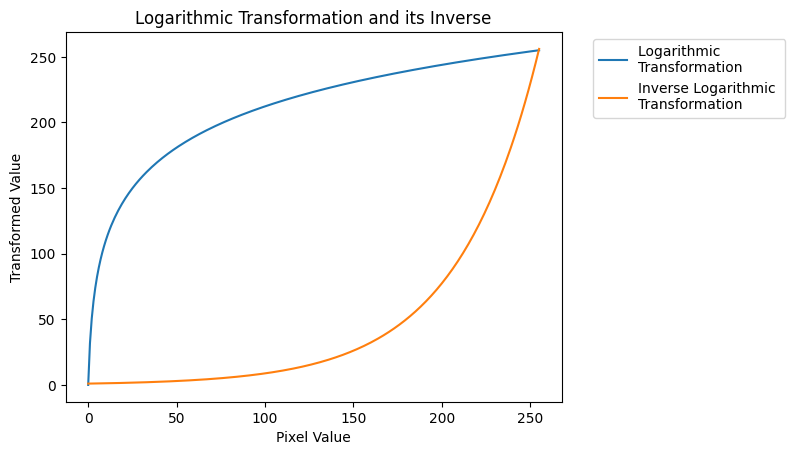

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

img_range = range(256)
c = 255 / np.log(1 + np.max(np.array(img_range)))
img_log = c * np.log(1 + np.array(img_range))
img_inv = np.exp(img_range/c)

plt.plot(img_range, img_log, label='Logarithmic \nTransformation')
plt.plot(img_range, img_inv, label='Inverse Logarithmic \nTransformation')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Pixel Value')
plt.ylabel('Transformed Value')
plt.title('Logarithmic Transformation and its Inverse')
plt.show()


## 3. Power - Law (Gamma) Transformation

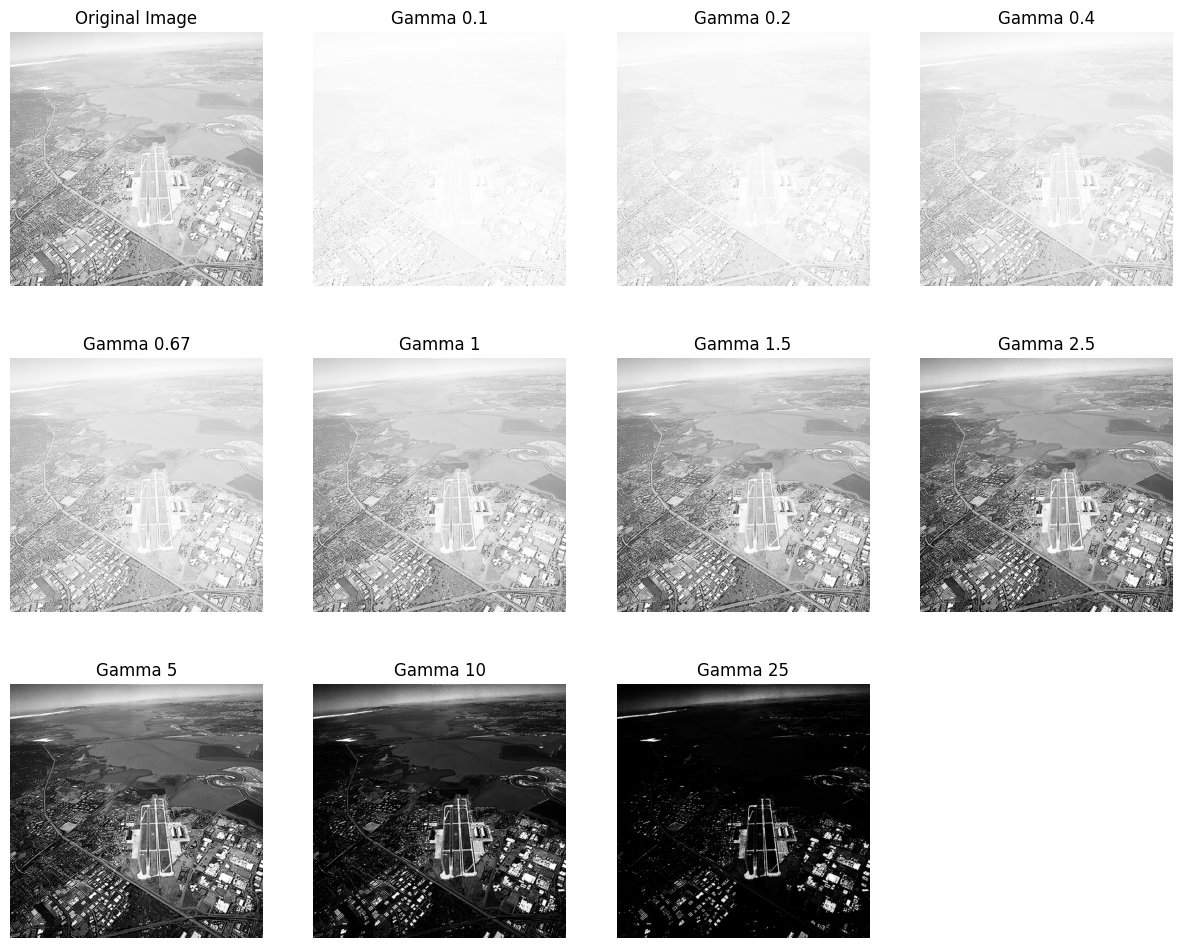

In [ ]:
img_light = cv2.imread("/content/drive/MyDrive/dip_Images/Fig0309(a)(washed_out_aerial_image).tif",cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(15,12))
gammas = [0.04, 0.1, 0.2, 0.4, 0.67, 1 , 1.5, 2.5, 5, 10, 25]
img_no = 1
for gamma in gammas:
    img_pl = 255*(img_light/255)**gamma
    if img_no == 1:
        imshow("Original Image",img_light, subplot=True, row=3, col=4, num=1)
    else:
        imshow(f"Gamma {gamma}",img_pl, subplot=True, row=3, col=4, num=img_no)
    img_no += 1


### Power Law Plot

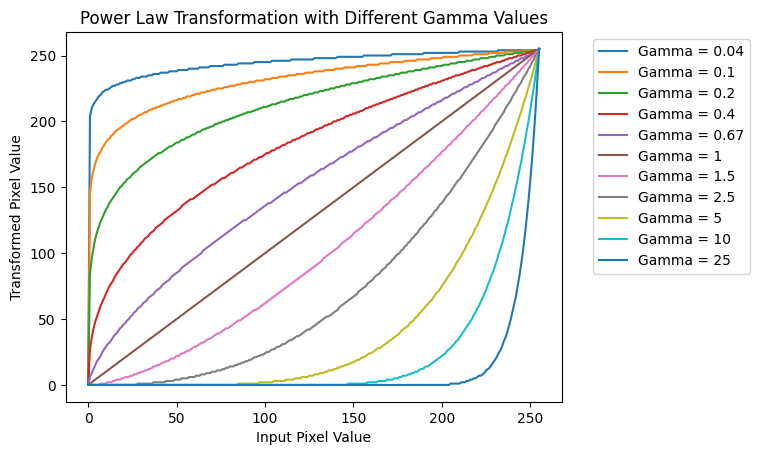

In [ ]:
img_range = np.arange(256)
gammas = [0.04, 0.1, 0.2, 0.4, 0.67, 1, 1.5, 2.5, 5, 10, 25]

for gamma in gammas:
    img_pl = (255 * (img_range / 255) ** gamma).astype(np.uint8)
    plt.plot(img_range, img_pl, label=f'Gamma = {gamma}')

plt.title('Power Law Transformation with Different Gamma Values')
plt.xlabel('Input Pixel Value')
plt.ylabel('Transformed Pixel Value')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


## 4. Image Flipping

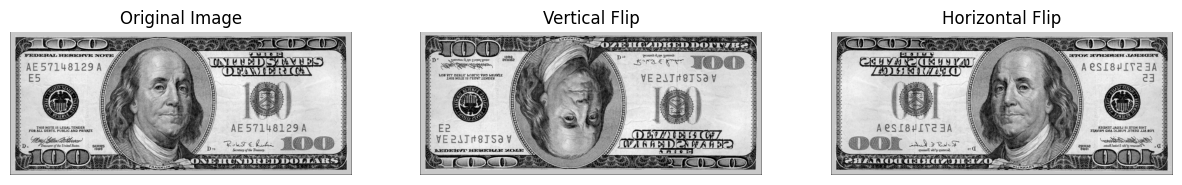

In [ ]:
plt.figure(figsize=(15,12))
img_dollar = cv2.imread("/content/drive/MyDrive/dip_Images/Fig0314(a)(100-dollars).tif",cv2.COLOR_BGR2GRAY)
imshow("Original Image",img_dollar, subplot=True, row=1, col=3, num=1)

img_flip_v = cv2.flip(img_dollar, 0)
imshow("Vertical Flip",img_flip_v, subplot=True, row=1, col=3, num=2)

img_flip_h = cv2.flip(img_dollar, 1)
imshow("Horizontal Flip",img_flip_h, subplot=True, row=1, col=3, num=3)


## END